### Exploratory Data Analysis of Homer Segementation Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# from kmodes import kmodes, kprototypes
import scipy.stats as scs
import seaborn as sns
from homer_clean_data import remove_outliers
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

df_users = pd.read_pickle('data/df_users.pkl')
df = pd.read_pickle('data/df.pkl')

In [2]:
df.shape

(794259, 15)

In [3]:
df_users.shape

(18769, 15)

In [4]:
df_users['NumSims'].describe()

count    18769.000000
mean        42.317598
std        158.501918
min          1.000000
25%          2.000000
50%          8.000000
75%         31.000000
max       6699.000000
Name: NumSims, dtype: float64

In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 15 columns):
UserId              18769 non-null object
NumSims             18769 non-null int64
UserRole            18769 non-null object
OrganizationType    18769 non-null object
Latitude            18769 non-null float64
Longitude           18769 non-null float64
MultiGenSearch      18769 non-null object
MultiWindSearch     18769 non-null object
MultiBatSearch      18769 non-null object
MultiPvSearch       18769 non-null object
MultiConSearch      18769 non-null object
DefaultGenerator    18769 non-null object
ImportedWind        18769 non-null int64
ImportedSolar       18769 non-null int64
Country             18769 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 2.1+ MB


In [2]:
# df_users.UserRole.value_counts(dropna=False)
grps = df_users.UserRole.value_counts(dropna=False)
pct = [x / float(sum(grps)) for x in grps]

s1 = pd.Series(grps.values, index=grps.index, name='count')
s2 = pd.Series(pct, index=grps.index, name='%total')
s2 = s2.apply(lambda x: round(x*100, 2))
df_grp = pd.concat([s1, s2], axis=1)
df_grp

,count,%total
Academic,9417,50.17
Technical,5022,26.76
NA,2971,15.83
Business,1359,7.24


In [3]:
# df_users.OrganizationType.value_counts(dropna=False)
grps = df_users.OrganizationType.value_counts(dropna=False)
pct = [x / float(sum(grps)) for x in grps]

s1 = pd.Series(grps.values, index=grps.index, name='count')
s2 = pd.Series(pct, index=grps.index, name='%total')
s2 = s2.apply(lambda x: round(x*100, 2))
df_grp = pd.concat([s1, s2], axis=1)
df_grp

,count,%total
Academic,7935,42.28
NA,6081,32.40
Engineering,3378,18.00
Vendor,642,3.42
Public,402,2.14
Service,331,1.76


In [8]:
df_users.describe()

,NumSims,Latitude,Longitude,ImportedWind,ImportedSolar
count,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000
mean,42.317598,0.241939,-30.899002,0.048697,0.053546
std,158.501918,3110.546223,5338.272379,0.215240,0.225125
min,1.000000,-423739.000000,-731242.000000,0.000000,0.000000
25%,2.000000,3.075920,-72.665072,0.000000,0.000000
50%,8.000000,26.059152,15.675261,0.000000,0.000000
75%,31.000000,40.014900,77.400000,0.000000,0.000000
max,6699.000000,44879.783330,395.795455,1.000000,1.000000


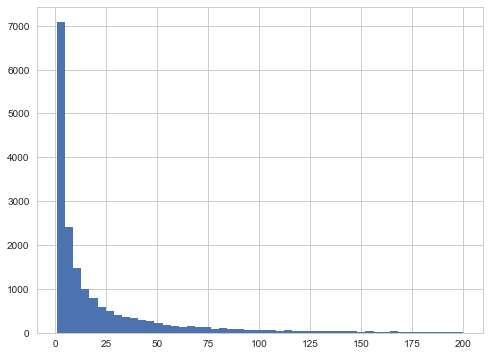

In [5]:
sims = df_users['NumSims'].values
mu = sims.mean()
std = sims.std()
sims = [s for s in sims if s <= mu + std and s >= mu - std]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist(sims, bins=50)
plt.show()

### EDA with clustered data (by user and simulation)

In [6]:
df_users_clustered = pd.read_pickle('data/df_users_clustered.pkl')
df_clustered = pd.read_pickle('data/df_clustered.pkl')

In [7]:
df_users_clustered.shape

(18769, 17)

In [8]:
df_clustered.shape

(794253, 17)

In [14]:
df_users_clustered.columns

Index(['UserId', 'NumSims', 'UserRole', 'OrganizationType', 'Latitude',
       'Longitude', 'ImportedWind', 'ImportedSolar', 'ElectricNotDefault',
       'GeneratorNotDefault', 'GenCapCost', 'BatCapCost', 'WindCapCost',
       'PvCapCost', 'GenCostMultiLines', 'WindCostMultiLines',
       'BatCostMultiLines', 'PvCostMultiLines', 'ConCostMultiLines',
       'NumChangedInputs', 'Country', 'KM_Cluster'],
      dtype='object')

In [9]:
bool_cols = ('ImportedWind', 'ImportedSolar', 'Sample')

for col in bool_cols:
    df_users_clustered[col] = df_users_clustered[col].astype(bool)
    df_clustered[col] = df_clustered[col].astype(bool)

In [10]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794253 entries, 0 to 794252
Data columns (total 17 columns):
UserRole            794253 non-null object
OrganizationType    794253 non-null object
Latitude            794253 non-null float64
Longitude           794253 non-null float64
User                794253 non-null object
Created             794253 non-null datetime64[ns]
Sample              794253 non-null bool
ImportedWind        794253 non-null bool
ImportedSolar       794253 non-null bool
MultiGenSearch      794253 non-null object
MultiWindSearch     794253 non-null object
MultiBatSearch      794253 non-null object
MultiPvSearch       794253 non-null object
MultiConSearch      794253 non-null object
DefaultGenerator    794253 non-null object
Country             794253 non-null object
Cluster             794253 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 87.1+ MB


In [13]:
# User clusters by clustering algorithm
# AG_0_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 0]
# AG_1_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 1]
# AG_2_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 2]
# AG_3_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 3]
# AG_4_u = df_users_clustered[df_users_clustered['AG_Cluster'] == 4]

C1_u = df_users_clustered[df_users_clustered['Cluster'] == 1]
C2_u = df_users_clustered[df_users_clustered['Cluster'] == 2]
C3_u = df_users_clustered[df_users_clustered['Cluster'] == 3]
C4_u = df_users_clustered[df_users_clustered['Cluster'] == 4]

# GM_0_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 0]
# GM_1_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 1]
# GM_2_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 2]
# GM_3_u = df_users_clustered[df_users_clustered['GM_Cluster'] == 3]

# Simulation clusters by clustering algorithm
# AG_0_s = df_clustered[df_users_clustered['AG_Cluster'] == 0]
# AG_1_s = df_clustered[df_users_clustered['AG_Cluster'] == 1]
# AG_2_s = df_clustered[df_users_clustered['AG_Cluster'] == 2]
# AG_3_s = df_clustered[df_users_clustered['AG_Cluster'] == 3]

C1_s = df_clustered[df_clustered['Cluster'] == 1]
C2_s = df_clustered[df_clustered['Cluster'] == 2]
C3_s = df_clustered[df_clustered['Cluster'] == 3]
C4_s = df_clustered[df_clustered['Cluster'] == 4]

# GM_0_s = df_clustered[df_users_clustered['GM_Cluster'] == 0]
# GM_1_s = df_clustered[df_users_clustered['GM_Cluster'] == 1]
# GM_2_s = df_clustered[df_users_clustered['GM_Cluster'] == 2]
# GM_3_s = df_clustered[df_users_clustered['GM_Cluster'] == 3]

In [48]:
# User role distributions per cluster
# print('AG Cluster 0')
# print(AG_0_u.UserRole.value_counts(dropna=False))
# print('\n')
# print('AG Cluster 1')
# print(AG_1_u.UserRole.value_counts(dropna=False))
# print('\n')
# print('AG Cluster 2')
# print(AG_2_u.UserRole.value_counts(dropna=False))
# print('\n')
# print('AG Cluster 3')
# print(AG_3_u.UserRole.value_counts(dropna=False))
# print('AG Cluster 4')
# print(AG_4_u.UserRole.value_counts(dropna=False))

# grp = df_users_clustered.groupby('AG_Cluster')['UserRole'].count()
# grp.plot(kind='bar').set_ylabel('Number of Users');

Cluster 1
Academic     3061
Technical    1266
NA            798
Business      365
Name: UserRole, dtype: int64


Cluster 2
Academic     3029
Technical    1023
NA            599
Business      353
Name: UserRole, dtype: int64


Cluster 3
Academic     3036
Technical     906
NA            839
Business      415
Name: UserRole, dtype: int64


Cluster 4
Technical    1827
NA            735
Academic      291
Business      226
Name: UserRole, dtype: int64


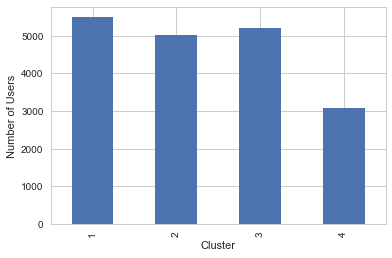

In [14]:
# User role distributions per cluster
print('Cluster 1')
print(C1_u.UserRole.value_counts(dropna=False))
print('\n')
print('Cluster 2')
print(C2_u.UserRole.value_counts(dropna=False))
print('\n')
print('Cluster 3')
print(C3_u.UserRole.value_counts(dropna=False))
print('\n')
print('Cluster 4')
print(C4_u.UserRole.value_counts(dropna=False))

grp = df_users_clustered.groupby('Cluster')['UserRole'].count()
grp.plot(kind='bar').set_ylabel('Number of Users');

In [50]:
# Mean number of simulations per user cluster
# print(df_users_clustered.AG_Cluster.value_counts(dropna=False))
# grp = df_users_clustered.groupby('AG_Cluster')['NumSims'].mean()
# grp.plot(kind='bar').set_ylabel('Number of Simulations');

In [ ]:
# print(df_users_clustered.GM_Cluster.value_counts(dropna=False))
# grp = df_users_clustered.groupby('GM_Cluster')['NumSims'].mean()
# grp.plot(kind='bar').set_ylabel('Number of Simulations');

1    3527
3    1884
0    1740
4    1149
2     441
Name: KM_Cluster, dtype: int64


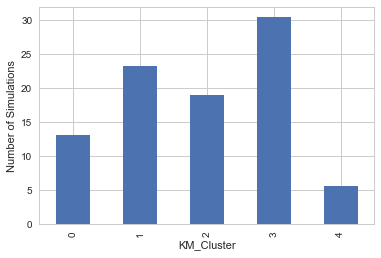

In [19]:
print(df_users_clustered.KM_Cluster.value_counts(dropna=False))
grp = df_users_clustered.groupby('KM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

In [20]:
df['Created'].head()

0   2016-06-30 23:54:38
1   2016-03-11 09:31:09
2   2017-02-09 11:03:23
3   2016-03-15 09:20:52
4   2015-04-22 11:23:22
Name: Created, dtype: datetime64[ns]

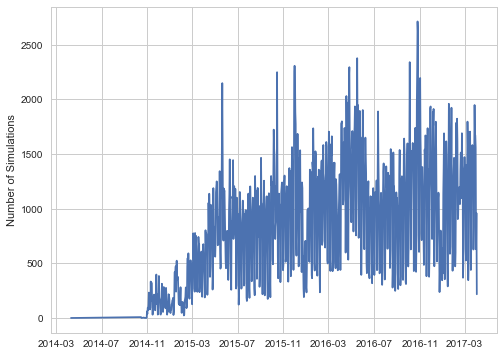

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

date_count = df_clustered.groupby(df_clustered['Created'].dt.date)['User'].count()
ax.plot(date_count)
ax.set_ylabel('Number of Simulations')
plt.show()

In [22]:
sum(date_count)

176290

In [ ]:
# categorical vs categorical vs numeric
# agg = df_users_clustered.groupby(['GM_Cluster', 'UserRole'])['NumSims'].mean()
# print(agg)
# agg = agg.unstack(level='UserRole')
# print(agg)
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

KM_Cluster  UserRole 
0           Academic     13.008036
            Business     24.918699
            NA           11.193182
            Technical     9.767726
1           Academic     20.533547
            Business     42.909639
            NA           29.968254
            Technical    20.862745
2           Academic     16.935361
            Business     10.296296
            NA           55.514286
            Technical    14.336207
3           Business     32.287500
            NA           17.520430
            Technical    34.707244
4           Academic      4.241667
            Business      4.833333
            NA            7.497288
            Technical     3.316860
Name: NumSims, dtype: float64
UserRole     Academic   Business         NA  Technical
KM_Cluster                                            
0           13.008036  24.918699  11.193182   9.767726
1           20.533547  42.909639  29.968254  20.862745
2           16.935361  10.296296  55.514286  14.336207
3       

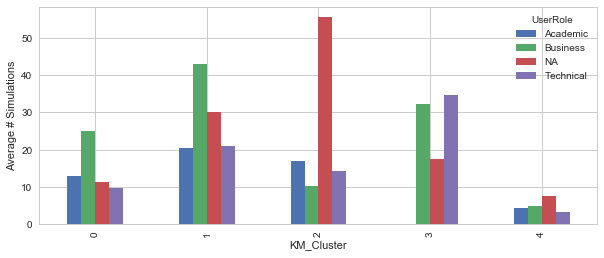

In [23]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['KM_Cluster', 'UserRole'])['NumSims'].mean()
print(agg)
agg = agg.unstack(level='UserRole')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

In [ ]:
# categorical vs categorical vs numeric
# agg = df_users_clustered.groupby(['AG_Cluster', 'UserRole'])['NumSims'].mean()
# print(agg)
# agg = agg.unstack(level='UserRole')
# print(agg)
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

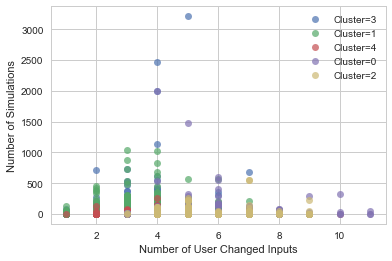

In [24]:
# Scatter plot by category
clusters = df_users_clustered['KM_Cluster'].unique()
for clust in clusters:
    plt.plot(df_users_clustered.loc[df_users_clustered.KM_Cluster==clust, 'NumChangedInputs'], 
             df_users_clustered.loc[df_users_clustered.KM_Cluster==clust, 'NumSims'], 
             linestyle='',
             marker='o',
             alpha=.7, label='Cluster={}'.format(clust))
plt.xlabel('Number of User Changed Inputs')
plt.ylabel('Number of Simulations')
plt.legend(numpoints=1);

In [26]:
df_users_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 22 columns):
UserId                 8741 non-null object
NumSims                8741 non-null int64
UserRole               8741 non-null category
OrganizationType       8741 non-null category
Latitude               8741 non-null float64
Longitude              8741 non-null float64
ImportedWind           8741 non-null bool
ImportedSolar          8741 non-null bool
ElectricNotDefault     8741 non-null bool
GeneratorNotDefault    8741 non-null bool
GenCapCost             8741 non-null bool
BatCapCost             8741 non-null bool
WindCapCost            8741 non-null bool
PvCapCost              8741 non-null bool
GenCostMultiLines      8741 non-null bool
WindCostMultiLines     8741 non-null bool
BatCostMultiLines      8741 non-null bool
PvCostMultiLines       8741 non-null bool
ConCostMultiLines      8741 non-null bool
NumChangedInputs       8741 non-null int64
Country                8741 non-nul

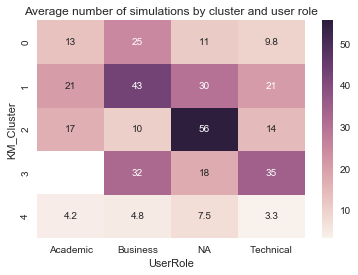

In [27]:
# Heat-map
agg = df_users_clustered.groupby(['KM_Cluster', 'UserRole'])['NumSims'].mean()
ax = sns.heatmap(agg.unstack(level='UserRole'), annot=True)
ax.set_title('Average number of simulations by cluster and user role')

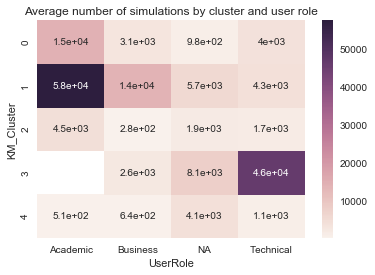

In [57]:
# Heat-map
agg = df_clustered.groupby(['KM_Cluster', 'UserRole'])['UserRole'].count()
ax = sns.heatmap(agg.unstack(level='UserRole'), annot=True)
ax.set_title('Average number of simulations by cluster and user role')

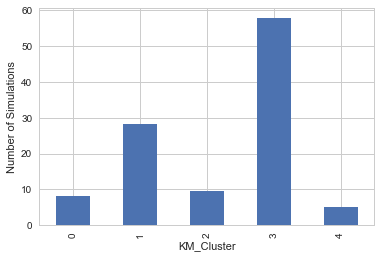

In [30]:
df_usa = df_users_clustered[df_users_clustered['Country'] == 'US']
df_usa.head()

grp = df_usa.groupby('KM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

In [ ]:
# categorical vs categorical vs numeric
# agg = df_users_clustered.groupby(['GM_Cluster', 'OrganizationType'])['OrganizationType'].count()
# print(agg)
# agg = agg.unstack(level='OrganizationType')
# print(agg)
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

KM_Cluster  OrganizationType
0           Academic             981
            Engineering          299
            NA                   340
            Public                39
            Service               22
            Vendor                59
1           Academic            2392
            Engineering          388
            NA                   530
            Public                64
            Service               56
            Vendor                97
2           Academic             197
            Engineering           47
            NA                   172
            Public                 5
            Service               10
            Vendor                10
3           Engineering          687
            NA                  1018
            Public                35
            Service               37
            Vendor               107
4           Academic              43
            Engineering          298
            NA                   670
         

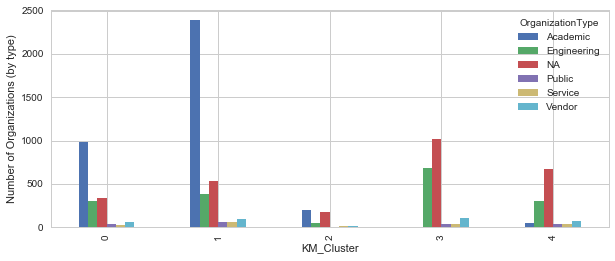

In [31]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['KM_Cluster', 'OrganizationType'])['OrganizationType'].count()
print(agg)
agg = agg.unstack(level='OrganizationType')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

In [ ]:
# Categorical vs categorical vs numeric
# agg = df_users_clustered.groupby(['AG_Cluster', 'OrganizationType'])['OrganizationType'].count()
# print(agg)
# agg = agg.unstack(level='OrganizationType')
# print(agg)
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

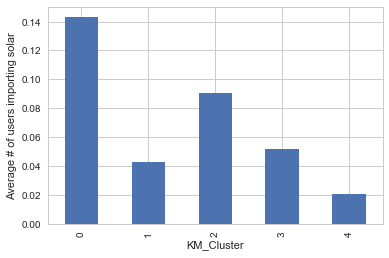

In [33]:
grp = df_users_clustered.groupby('KM_Cluster')['ImportedSolar'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users importing solar');

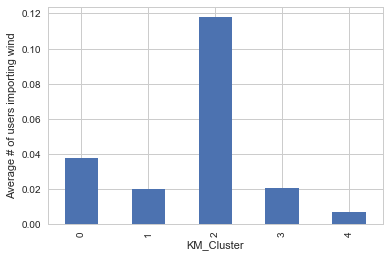

In [34]:
grp = df_users_clustered.groupby('KM_Cluster')['ImportedWind'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users importing wind');

In [ ]:
df_users_clustered.info()

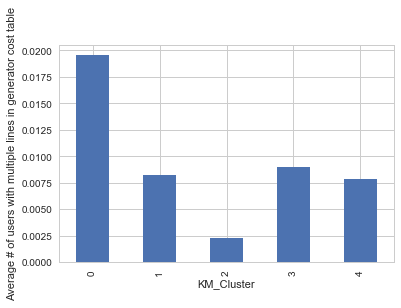

In [35]:
grp = df_users_clustered.groupby('KM_Cluster')['GenCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in generator cost table');

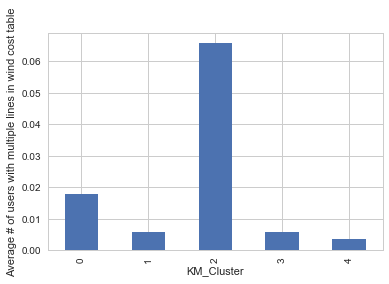

In [36]:
grp = df_users_clustered.groupby('KM_Cluster')['WindCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in wind cost table');

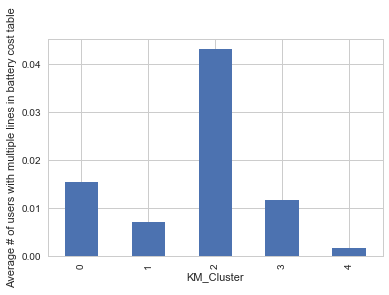

In [37]:
grp = df_users_clustered.groupby('KM_Cluster')['BatCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in battery cost table');

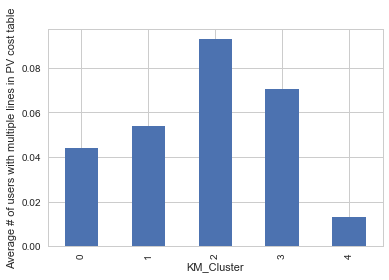

In [38]:
grp = df_users_clustered.groupby('KM_Cluster')['PvCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in PV cost table');

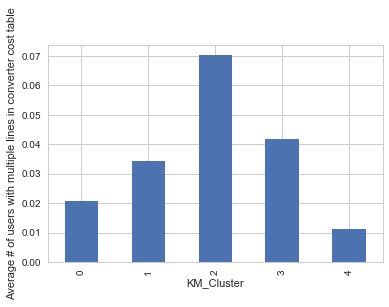

In [39]:
grp = df_users_clustered.groupby('KM_Cluster')['ConCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in converter cost table');

In [71]:
df_users_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 22 columns):
UserId                 8741 non-null object
NumSims                8741 non-null int64
UserRole               8741 non-null category
OrganizationType       8741 non-null category
Latitude               8741 non-null float64
Longitude              8741 non-null float64
ImportedWind           8741 non-null bool
ImportedSolar          8741 non-null bool
ElectricNotDefault     8741 non-null bool
GeneratorNotDefault    8741 non-null bool
GenCapCost             8741 non-null bool
BatCapCost             8741 non-null bool
WindCapCost            8741 non-null bool
PvCapCost              8741 non-null bool
GenCostMultiLines      8741 non-null bool
WindCostMultiLines     8741 non-null bool
BatCostMultiLines      8741 non-null bool
PvCostMultiLines       8741 non-null bool
ConCostMultiLines      8741 non-null bool
NumChangedInputs       8741 non-null int64
Country                8741 non-nul

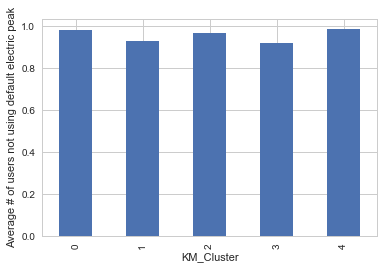

In [40]:
grp = df_users_clustered.groupby('KM_Cluster')['ElectricNotDefault'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users not using default electric peak');

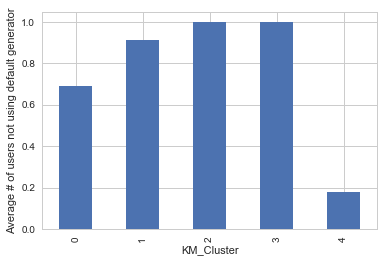

In [41]:
grp = df_users_clustered.groupby('KM_Cluster')['GeneratorNotDefault'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users not using default generator');

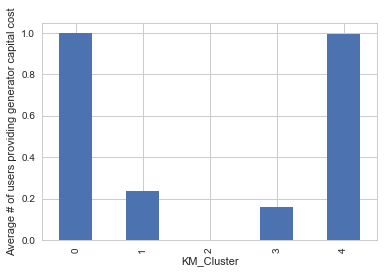

In [42]:
grp = df_users_clustered.groupby('KM_Cluster')['GenCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing generator capital cost');

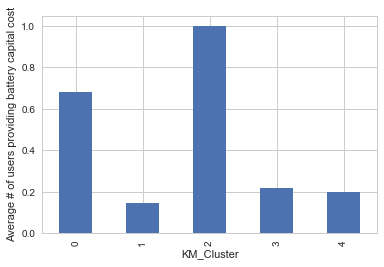

In [43]:
grp = df_users_clustered.groupby('KM_Cluster')['BatCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing battery capital cost');

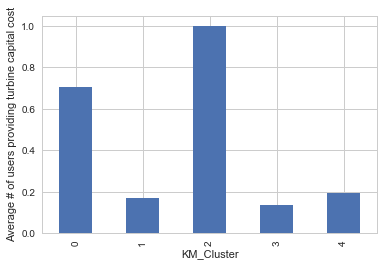

In [44]:
grp = df_users_clustered.groupby('KM_Cluster')['WindCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing turbine capital cost');

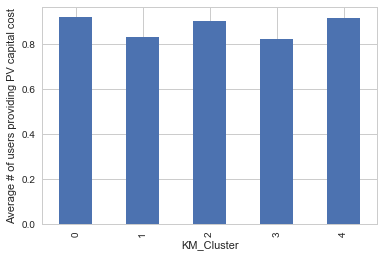

In [45]:
grp = df_users_clustered.groupby('KM_Cluster')['PvCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing PV capital cost');

In [ ]:
# np.round(cluster3[['NumSims', 'DaysSinceFirst']].describe(), 2).T[['count','mean', 'std', 'min', 'max']]

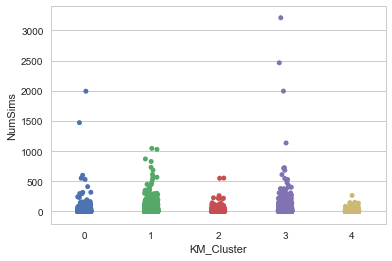

In [47]:
# df_users_clustered_clean = remove_outliers(df_users_clustered)

sns.stripplot(x='KM_Cluster', y='NumSims', data=df_users_clustered, jitter=True);

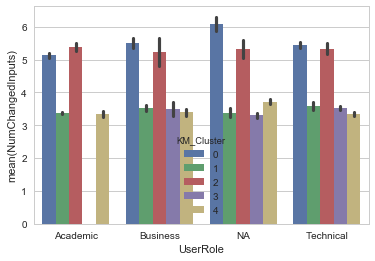

In [48]:
# sns.violinplot(x='NumSims', y='KM_Cluster', hue='UserRole', data=df_users_clustered_clean);
sns.barplot(x='UserRole', y='NumChangedInputs', hue='KM_Cluster', data=df_users_clustered);

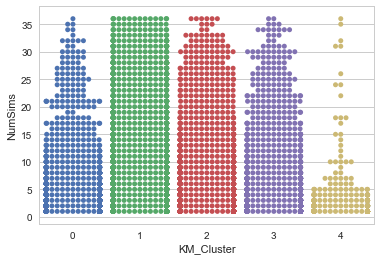

In [27]:
sns.swarmplot(x='KM_Cluster', y='NumSims', data=df_users_clustered);

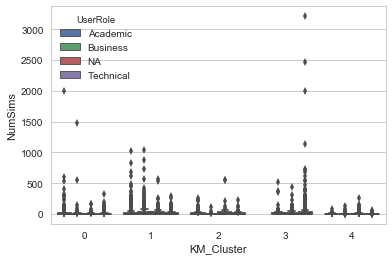

In [49]:
sns.boxplot(x='KM_Cluster', y='NumSims', hue='UserRole', data=df_users_clustered);

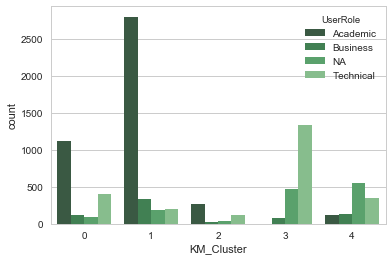

In [50]:
sns.countplot(x='KM_Cluster', hue='UserRole', data=df_users_clustered, palette="Greens_d");

In [52]:
np.max(df_users_clustered['NumSims'])

3211

In [53]:
df_users_clustered['NumSims'].describe()

count    8741.000000
mean       20.168173
std        75.455460
min         1.000000
25%         1.000000
50%         4.000000
75%        15.000000
max      3211.000000
Name: NumSims, dtype: float64

In [22]:
df_users_clustered.shape

(8741, 22)

In [23]:
df_users_clustered_clean.shape

(7698, 22)

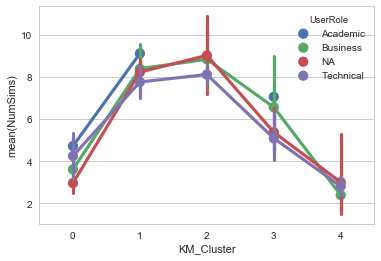

In [25]:
sns.pointplot(x='KM_Cluster', y='NumSims', hue='UserRole', data=df_users_clustered_clean);

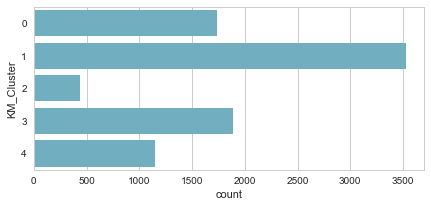

In [54]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y='KM_Cluster', data=df_users_clustered, color="c");

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176290 entries, 0 to 176289
Data columns (total 20 columns):
UserRole               176290 non-null category
OrganizationType       176290 non-null category
Latitude               176290 non-null float64
Longitude              176290 non-null float64
User                   176290 non-null object
Created                176290 non-null datetime64[ns]
ImportedWind           176290 non-null int64
ImportedSolar          176290 non-null int64
ElectricNotDefault     176290 non-null int64
GeneratorNotDefault    176290 non-null int64
GenCapCost             176290 non-null int64
BatCapCost             176290 non-null int64
WindCapCost            176290 non-null int64
PvCapCost              176290 non-null int64
GenCostMultiLines      176290 non-null int64
WindCostMultiLines     176290 non-null int64
BatCostMultiLines      176290 non-null int64
PvCostMultiLines       176290 non-null int64
ConCostMultiLines      176290 non-null int64
Country       

In [20]:
print('Cluster 1')
print(C1_s.MultiGenSearch.value_counts(dropna=False))
print('\n')
print('Cluster 2')
print(C2_s.MultiGenSearch.value_counts(dropna=False))
print('\n')
print('Cluster 3')
print(C3_s.MultiGenSearch.value_counts(dropna=False))
print('\n')
print('Cluster 4')
print(C4_s.MultiGenSearch.value_counts(dropna=False))
print('\n')

Cluster 1
NA       202586
False     31055
True      12521
Name: MultiGenSearch, dtype: int64


Cluster 2
False    100125
True      61462
NA        33095
Name: MultiGenSearch, dtype: int64


Cluster 3
False    132209
NA        15772
True       7629
Name: MultiGenSearch, dtype: int64


Cluster 4
False    147087
NA        30170
True      20542
Name: MultiGenSearch, dtype: int64




In [22]:
grps = C1_s.MultiGenSearch.value_counts(dropna=False)
pct = [x / float(sum(grps)) for x in grps]

s1 = pd.Series(grps.values, index=grps.index, name='count')
s2 = pd.Series(pct, index=grps.index, name='%total')
s2 = s2.apply(lambda x: round(x*100, 2))
df_grp = pd.concat([s1, s2], axis=1)
df_grp

,count,%total
NA,202586,82.30
False,31055,12.62
True,12521,5.09


In [113]:
def by_cluster(col):
    frames = []
    clusters = [C1_s, C2_s, C3_s, C4_s]
    for idx, cluster in enumerate(clusters):
        grps = cluster[col].value_counts(dropna=False)
        pct = [x / float(sum(grps)) for x in grps]

        s1 = pd.Series(grps.values, index=grps.index, name='Count')
        s2 = pd.Series(pct, index=grps.index, name='Total%')
        s2 = s2.apply(lambda x: round(x*100, 2))
        
        df_grp = pd.concat([s1, s2], axis=1)
        df_grp =df_grp.reindex(['True', 'False', 'NA'])
        frames.append(df_grp)
        
    df_combo = pd.concat(frames, axis=1)
    vals = df_combo.values

    l1 = ['Cluster 1', 'Cluster 1', 'Cluster 2', 'Cluster 2', 'Cluster 3', 'Cluster 3', 'Cluster 4', 'Cluster 4']
    l2 = ['Count', 'Total%', 'Count', 'Total%', 'Count', 'Total%', 'Count', 'Total%']

    tuples = list(zip(l1, l2))
    index = pd.MultiIndex.from_tuples(tuples, names=[col, ''])

    dff = pd.DataFrame(vals, index=['True', 'False', 'NA'], columns=index)
    return dff

dff = by_cluster('MultiBatSearch')
print(C1_s.MultiBatSearch.value_counts(dropna=False))
print(C2_s.MultiBatSearch.value_counts(dropna=False))

dff

False    97371
True     79417
NA       69374
Name: MultiBatSearch, dtype: int64
True     123028
NA        36605
False     35049
Name: MultiBatSearch, dtype: int64


MultiBatSearch Cluster 1        Cluster 2        Cluster 3        Cluster 4  \
                   Count Total%     Count Total%     Count Total%     Count   
True             79417.0  32.26  123028.0  63.19   26713.0  17.17   57039.0   
False            97371.0  39.56   35049.0  18.00  103369.0  66.43   79562.0   
NA               69374.0  28.18   36605.0  18.80   25528.0  16.41   61198.0   

MultiBatSearch         
               Total%  
True            28.84  
False           40.22  
NA              30.94

In [38]:
df_grp.sort_index(ascending=False)
df_grp.reindex(['NA', 'False', 'True'])

,count,%total
NA,33095,17.00
False,100125,51.43
True,61462,31.57


In [117]:
def user_counts(df):
    grps = df.UserRole.value_counts(dropna=False)
    pct = [x / float(sum(grps)) for x in grps]
    s1 = pd.Series(grps.values, index=grps.index, name='Count')
    s2 = pd.Series(pct, index=grps.index, name='Total%')
    s2 = s2.apply(lambda x: round(x*100, 2))
    df_grp = pd.concat([s1, s2], axis=1)
    return df_grp

print(user_counts(C2_s))

            Count  Total%
Academic   112825   57.95
Technical   36499   18.75
Business    26130   13.42
NA          19228    9.88


In [118]:
def org_counts(df):
    grps = df.OrganizationType.value_counts(dropna=False)
    pct = [x / float(sum(grps)) for x in grps]

    s1 = pd.Series(grps.values, index=grps.index, name='Count')
    s2 = pd.Series(pct, index=grps.index, name='Total%')
    s2 = s2.apply(lambda x: round(x*100, 2))
    df_grp = pd.concat([s1, s2], axis=1)
    return df_grp

print(org_counts(C2_s))

             Count  Total%
Academic     94254   48.41
Engineering  41005   21.06
NA           38011   19.52
Vendor       14503    7.45
Public        4101    2.11
Service       2808    1.44


Cluster 1 Summary:
Nearly half of all simulations in cluster #1 were run by academic users. Academic organizations also make up 40 percent of simulations for this cluster. Of the users in this cluster, business and technical users ran the highest average number of simulations of 73 and 55, respectfully. Of the four clusters, this cluster had the lowest average in regards to simulations run with imported wind data (5 percent on average), and 8 percent of simulations were run with imported solar data. The average for simulations run using HOMER's sample file was below the global mean, but on par with clusters 3 and 4. Of the hardware categories available for modeling, cluster #1 simulations were predominately run without modeling a generator(s). Of the simulations in this cluster that did model a generator, only 5 percent simulated multiple generator specifications. A similar trend was observed for wind turbines, in that 75 percent did not model turbines, and of those simulations modeling turbines, only 7 percent performed a grid search of multiple turbine specifications. However, cluster #1 simulations did model on average the second highest percentage of solar panels (87 percent). Of the simulations modeling solar panels, 37 percent tested multiple panel specifications, and 24 percent of simulations modeled multiple converter capacities.

Key takeaways: 
While simulations are primarily run by academic users and/or academic institutions in this cluster, a significant share of simulations were modeled by technical users or by engineering companies. Given that this cluster had the lowest average for importing wind data and 75 percent of simulations did not include turbine hardware, it can reasonably be assumed the simulators are less likely to be interested in wind turbine hardware, regardless of whether a project comes to fruition. Furthermore, most simualtions (82 percent) did not model generators in this cluster, lowering the oddds that generators are of interest to these users.

Cluster 2 Summary: